## Bernoulli Distribution
---

Let us define a random variable $X_i$ $(i=1,\dots,n)$ corresponding to tossing a coin such that
$$
X_i = 
	\begin{cases}
	1, & \text{Head is obtained}; \\
	0, & \text{Tail is obtained},
	\end{cases}
$$
and 
$$
	\Pr(X_i=1) = \theta,\quad \Pr(X_i=0) = 1-\theta.
$$
Then $X_i$ follows the <font color=red>Bernoulli distribution</font> and its p.f. is given by
$$
	f(x_i|\theta) = \theta^{x_i}(1-\theta)^{1-x_i},\quad x_i=0,1.
$$
Then the joint p.f. of $D=(x_1,\dots,x_n)$ is
\begin{align*}
	f(D|\theta) &= \prod_{i=1}^n f(x_i|\theta) = \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i} \\
	&= \theta^{y}(1-\theta)^{n-y},\quad y = \sum_{i=1}^n x_i.
\end{align*}
When we regard $f(D|\theta)$ as a function of $\theta$, it is called the <font color=red>likelihood</font> or <font color=red>likelihood function</font>.

## Likelihood of Bernoulli Probability
---

The following command enables plotting within cells.

In [1]:
%matplotlib inline

`import` literally imports a package named NumPy in Python. NumPy enable us to use vectors and matrices in Python. It also comes with numerous functions for mathematical computation. `as np` means that we use `np` as a abbreviation of `numpy`.

In [2]:
import numpy as np

This line imports PyPlot, a collection of functions for 2D/3D graphics.

In [3]:
import matplotlib.pyplot as plt

`q` is a 100 $\times$ 1 vector that contains a grid, {0.0, 0.01, $\ldots$, 1.0}. The first number in `linspace(0.1, 1.0, 101)` is the starting point, the second is the end point, and the third is the number of grid points.

In [4]:
q = np.linspace(0.0, 1.0, 101)

`print` shows the content of q

In [5]:
print(q)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


`n` is the number of observations.

In [6]:
n = 5

`y` is the number of 1's.

In [7]:
y = 4

`l` cotains the values of likelihood corresponding to `q`.

In [8]:
l = q ** y * (1.0 - q) ** (n - y)

The following lines create a graph of the likelihood `l`. `xlim` sets the limits of X-axis. `ylim` sets the limits of Y-axis. `xlabel` sets the label of X-axis. `$\\theta$` shows the Greek letter, $\theta$. `ylabel` sets the label of Y-axis. `savefig` saves the graph in a PNG file. `show` displays the graph on screen.

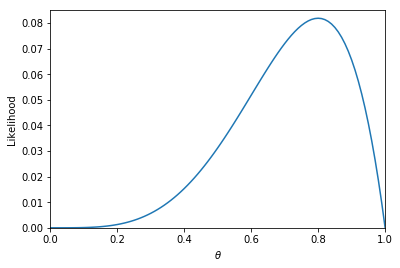

In [9]:
plt.plot(q, l)
plt.xlim(0, 1)
plt.ylim(0, 0.085)
plt.xlabel('$\\theta$')
plt.ylabel('Likelihood')
# plt.savefig('ms_fig_bernoulli_likelihood.png', dpi=300)
plt.show()

`scipy.stats` is a module in `SciPy`, a Python package for scientific computing. `scipy.stats` includes many functions for statistical analysis. `import`

In [10]:
import scipy.stats as st

The following cell draws a plot to illustrate two kinds of prior distribution for the probability of sucess in the Bernoulli distribution.

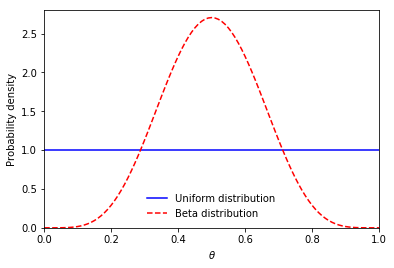

In [11]:
plt.plot(q, st.uniform.pdf(q), 'b-', label='Uniform distribution')
plt.plot(q, st.beta.pdf(q, 6, 6), 'r--', label='Beta distribution')
plt.xlim(0, 1)
plt.ylim(0, 2.8)
plt.legend(loc='best', frameon=False)
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
# plt.savefig('ms_fig_beta_prior.png', dpi=300)
plt.show()

`p` is the true vale of $\theta$. `n` is the sample size. `a_0` and `b_0` are hyper-parameters.

In [12]:
p = 0.5
n = 10
a_0 = 1.0
b_0 = 1.0

In [13]:
np.random.seed(99)
data = st.bernoulli.rvs(p, size=n)
print(data)

[1 0 1 0 1 1 0 0 1 0]


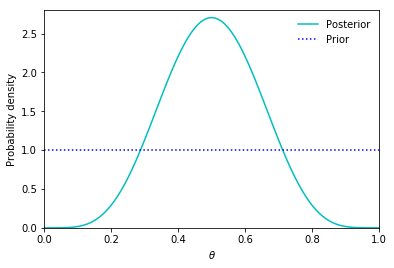

In [14]:
y = np.sum(data)
a_star = y + a_0
b_star = n - y + b_0
plt.plot(q, st.beta.pdf(q, a_star, b_star), 'c-', label='Posterior')
plt.plot(q, st.beta.pdf(q, a_0, b_0), 'b:',label='Prior')
plt.xlim(0, 1)
plt.ylim(0, 2.8)
plt.legend(loc='best', frameon=False)
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
plt.show()

In [18]:
np.random.seed(99)
data = st.bernoulli.rvs(p, size=250)
print(data)

[1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0
 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1
 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0]


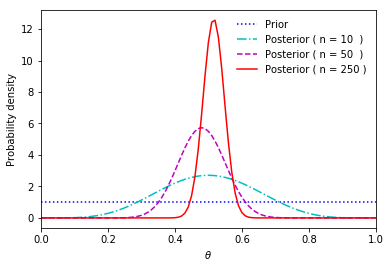

In [17]:
sample_size = np.array([10, 50, 250])
styles = [':', '-.', '--', '-']
colors = ['b', 'c', 'm', 'r']
index = 0
plt.plot(q, st.beta.pdf(q, a_0, b_0),
         color=colors[index], linestyle=styles[index],
         label='Prior')
for n_j in sample_size:
    index += 1
    sum_data = np.sum(data[:n_j])
    a_j = sum_data + a_0
    b_j = n_j - sum_data + b_0
    plt.plot(q, st.beta.pdf(q, a_j, b_j),
             color=colors[index], linestyle=styles[index],
             label='Posterior ( n = {0:<3d} )'.format(n_j))
plt.xlim(0, 1)
plt.legend(loc='best', frameon=False)
plt.xlabel('$\\theta$')
plt.ylabel('Probability density')
plt.show()